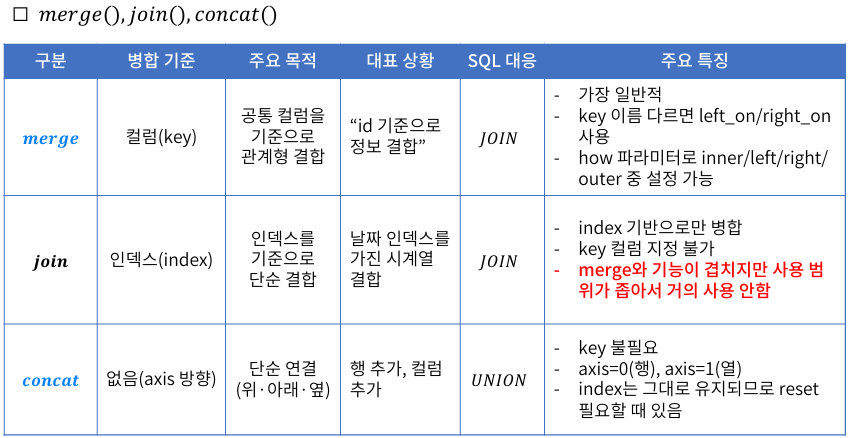

In [1]:
from hossam import load_data
from pandas import DataFrame
from pandas import merge

In [2]:
고객 = load_data("customer_no_name")
고객

[data] https://data.hossam.kr/data/lab04/customer-no-name.xlsx
[desc] 데이터프레임 병합 실습을 위한 고객번호와 고객 이름에 대한 가상 데이터(인덱스와 메타데이터 없음)
[!] Cannot read metadata


,고객번호,이름
0,1001,둘리
1,1002,도우너
2,1003,또치
3,1004,길동
4,1005,희동
5,1006,마이콜
6,1007,영희


In [3]:
매출 = load_data("customer_no_pay")
매출

[data] https://data.hossam.kr/data/lab04/customer-no-pay.xlsx
[desc] 데이터프레임 병합 실습을 위한 고객번호와 매출액에 대한 가상 데이터(인덱스와 메타데이터 없음)
[!] Cannot read metadata


,고객번호,금액
0,1001,10000
1,1001,20000
2,1005,15000
3,1006,5000
4,1008,100000
5,1001,30000


In [5]:
# inner join / 일치하는 데이터끼리 병합
merge(고객,매출)

,고객번호,이름,금액
0,1001,둘리,10000
1,1001,둘리,20000
2,1001,둘리,30000
3,1005,희동,15000
4,1006,마이콜,5000


In [6]:
merge(고객, 매출, how='left')   # left outer join / 왼쪽 기준 병합

,고객번호,이름,금액
0,1001,둘리,10000.0
1,1001,둘리,20000.0
2,1001,둘리,30000.0
3,1002,도우너,NaN
4,1003,또치,NaN
5,1004,길동,NaN
6,1005,희동,15000.0
7,1006,마이콜,5000.0
8,1007,영희,NaN


In [7]:
merge(고객, 매출, how="right")  # right outer join / 오른쪽 기준 병합

,고객번호,이름,금액
0,1001,둘리,10000
1,1001,둘리,20000
2,1005,희동,15000
3,1006,마이콜,5000
4,1008,NaN,100000
5,1001,둘리,30000


In [8]:
cd1 = load_data("customer_data1")
cd1

[data] https://data.hossam.kr/data/lab04/customer_data1.xlsx
[desc] 데이터 병합용 실습 데이터 (1) (인덱스/메타데이터 없음)
[!] Cannot read metadata


,고객명,날짜,데이터
0,민수,2018-01-01,20000
1,수영,2018-01-01,100000


In [9]:
cd2 = load_data("customer_data2")
cd2

[data] https://data.hossam.kr/data/lab04/customer_data2.xlsx
[desc] 데이터 병합용 실습 데이터 (2) (인덱스/메타데이터 없음)
[!] Cannot read metadata


,고객명,데이터
0,민수,21세
1,수영,20세


In [ ]:
#일치하는 데이터가 없어서 에러 / 데이터 컬럼은 있지만 값의 타입이 다름
merge(cd1,cd2)

In [ ]:
# on을 이용하여 병합의 기준이 되는 열을 지정
tmp = merge(cd1, cd2, on='고객명')
tmp

,고객명,날짜,데이터_x,데이터_y
0,민수,2018-01-01,20000,21세
1,수영,2018-01-01,100000,20세


두 데이터 프레임의 모든 컬럼 이름이 다른 경우

In [12]:
df_left = DataFrame({'이름': ['영희','철수'], '국어': [87,91]})
df_left

,이름,국어
0,영희,87
1,철수,91


In [13]:
df_right = DataFrame({'성명':['영희','철수'], '영어': [90,82]})
df_right

,성명,영어
0,영희,90
1,철수,82


In [15]:
# 왼쪽의 기준열 이름과 오른쪽의 기준열 이름을 각각 설정해야함
r3 = merge(df_left, df_right, left_on=['이름'], right_on=['성명'])
r3

,이름,국어,성명,영어
0,영희,87,영희,90
1,철수,91,철수,82


In [16]:
df_left = DataFrame({'수학': [90,82]}, index=['민철','봉구'])
df_left

,수학
민철,90
봉구,82


In [17]:
df_right = DataFrame({'국어': [90,82]}, index=['민철','철수'])
df_right

,국어
민철,90
철수,82


In [18]:
merge(df_left, df_right, left_index=True, right_index=True)

,수학,국어
민철,90,90


In [19]:
merge(df_left,df_right,left_index=True, right_index=True, how="left")

,수학,국어
민철,90,90.0
봉구,82,NaN


In [20]:
merge(df_left, df_right, left_index=True, right_index=True, how="right")

,수학,국어
민철,90.0,90
철수,NaN,82


In [21]:
merge(df_left, df_right, left_index=True, right_index=True, how="outer")

,수학,국어
민철,90.0,90.0
봉구,82.0,NaN
철수,NaN,82.0


In [22]:
df_left = DataFrame({'수학': [90,82]}, index=['민철','봉구'])
df_left

,수학
민철,90
봉구,82


In [23]:
df_right = DataFrame({'성명': ['민철','철수'], '영어':[90,82]})
df_right


,성명,영어
0,민철,90
1,철수,82


In [24]:
merge(df_left, df_right, left_index=True, right_on=['성명'])

,수학,성명,영어
0,90,민철,90


In [25]:
merge(df_left, df_right, left_index=True, right_on=['성명'], how="left")

,수학,성명,영어
0.0,90,민철,90.0
NaN,82,봉구,NaN


In [26]:
merge(df_left, df_right, left_index=True, right_on=['성명'], how="right")

,수학,성명,영어
0,90.0,민철,90
1,NaN,철수,82


In [27]:
tmp = merge(df_left, df_right, left_index=True, right_on=['성명'], how="outer")
tmp

,수학,성명,영어
0.0,90.0,민철,90.0
NaN,82.0,봉구,NaN
1.0,NaN,철수,82.0


In [28]:
tmp2 = tmp.set_index('성명')
tmp2

,수학,영어
성명,,
민철,90.0,90.0
봉구,82.0,NaN
철수,NaN,82.0


In [29]:
df3 = DataFrame({'customer_id': [101,102,103,104,105,106], 'name': ['Alice','Bob','Charlie','David','Eva','Frank'], 'age': [25,32,45,38,29,41]})
df3

,customer_id,name,age
0,101,Alice,25
1,102,Bob,32
2,103,Charlie,45
3,104,David,38
4,105,Eva,29
5,106,Frank,41


In [31]:
구매내역 = load_data("order_history")
구매내역

[data] https://data.hossam.kr/data/lab04/order_history.xlsx
[desc] 신입 데이터 분석가를 위한 실전 미션!

field        description
-----------  -------------
purchase_id  일련번호
customer_id  고객번호
item         상품명
price        금액



,customer_id,item,price
purchase_id,,,
1,101,Laptop,1200.0
2,102,Mouse,25.0
3,103,Keyboard,NaN
4,101,Monitor,300.0
5,104,Webcam,5000.0
6,102,USB Hub,30.0
7,105,Laptop,1100.0
8,103,Mouse,NaN
9,101,External HDD,80.0


In [34]:
import numpy as np
from sklearn.impute import SimpleImputer

imr = SimpleImputer(missing_values=np.nan, strategy='mean')
df_imr = imr.fit_transform(구매내역[['price']])
df_imr
구매내역price값처리 = 구매내역.copy()
구매내역price값처리['price'] = df_imr
구매내역price값처리

,customer_id,item,price
purchase_id,,,
1,101,Laptop,1200.000
2,102,Mouse,25.000
3,103,Keyboard,985.625
4,101,Monitor,300.000
5,104,Webcam,5000.000
6,102,USB Hub,30.000
7,105,Laptop,1100.000
8,103,Mouse,985.625
9,101,External HDD,80.000


<Axes: >

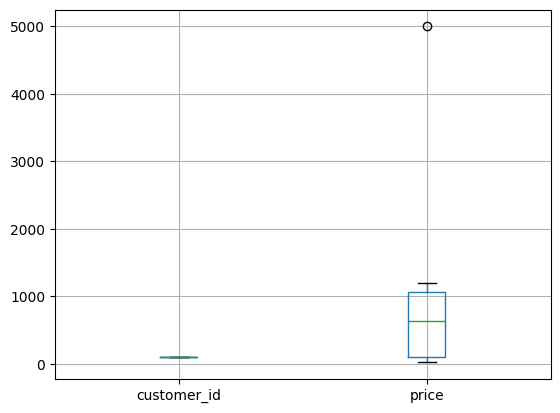

In [35]:
구매내역price값처리.boxplot()

In [ ]:
# re_df.loc[re_df['eng']>100,'eng']=np.nan
구매내역price값처리.loc[구매내역price값처리['price']>1000,'price']=np.nan